In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()

DATA_DIR = Path('./data')
REAL_DATA = Path(DATA_DIR / 'original/Real')
PROC_DIR = Path(DATA_DIR / 'processed')


In [2]:
real_files = [f for f in PROC_DIR.iterdir()]

In [3]:
# real_files = [f for f in REAL_DATA.iterdir()]
# # real_files

# for f in real_files:
#     with open(f, 'r') as tmp:
#         lines = tmp.readlines()

#         values = lines[2].replace('#', '').split(',')

#         values = [v.strip() for v in values]

#         lines[2] = ','.join(values) + '\n'

#         with open(f"{PROC_DIR / f.stem}.csv" , 'w') as out:
#             out.writelines(lines)
#         # print(lines[2])

In [4]:
def plot_file_data(paths : list, columns : list = ['R [Rsun]', 'B [G]', 'alpha [deg]'], num_rows : int = 640):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

    fig.set_figheight(10)
    fig.set_figwidth(10)
    x_values = [x for x in range(num_rows)]

    ax1.set(xlabel ='idx', ylabel = columns[0])
    ax2.set(xlabel ='idx', ylabel = columns[1])
    ax3.set(xlabel ='idx', ylabel = columns[2])

    flag = False
    for path in paths:
        df = pd.read_csv(str(path),  skiprows=2, usecols=columns)
        for j in df.columns:
            if(df[j].dtype != np.int64 and df[j].dtype != np.float64 ): #verifying if there's no weird data. if there is, skip
                flag = True
            break

        if (flag):
            continue
        ax1.plot(x_values, df[columns[0]],  linewidth=0.5)
        ax2.plot(x_values, df[columns[1]],  linewidth=0.5)
        ax3.plot(x_values, df[columns[2]],  linewidth=0.5)
        
        ax1.set_yscale('log')
        ax2.set_yscale('log')
        ax3.set_yscale('log')
        
    plt.show()

In [5]:
def plot_column(paths : list, column : str = 'R [Rsun]', num_rows : int = 640):

    plt.figure()
    
    x_values = [x for x in range(num_rows)]
    for path in paths:
        df = pd.read_csv(str(path),  skiprows=2, usecols=[column])
        df.columns = df.columns.str.strip()
        plt.plot(x_values, df[column],  linewidth=0.5)
    plt.show()
        

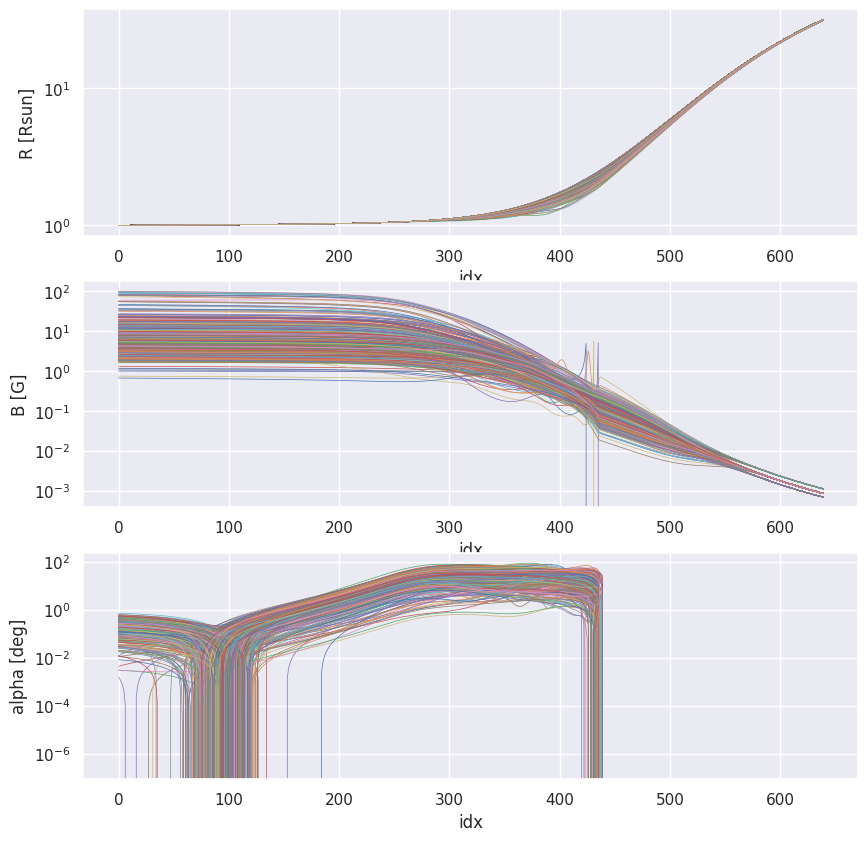

In [6]:
plot_file_data(real_files, ['R [Rsun]', 'B [G]', 'alpha [deg]'])


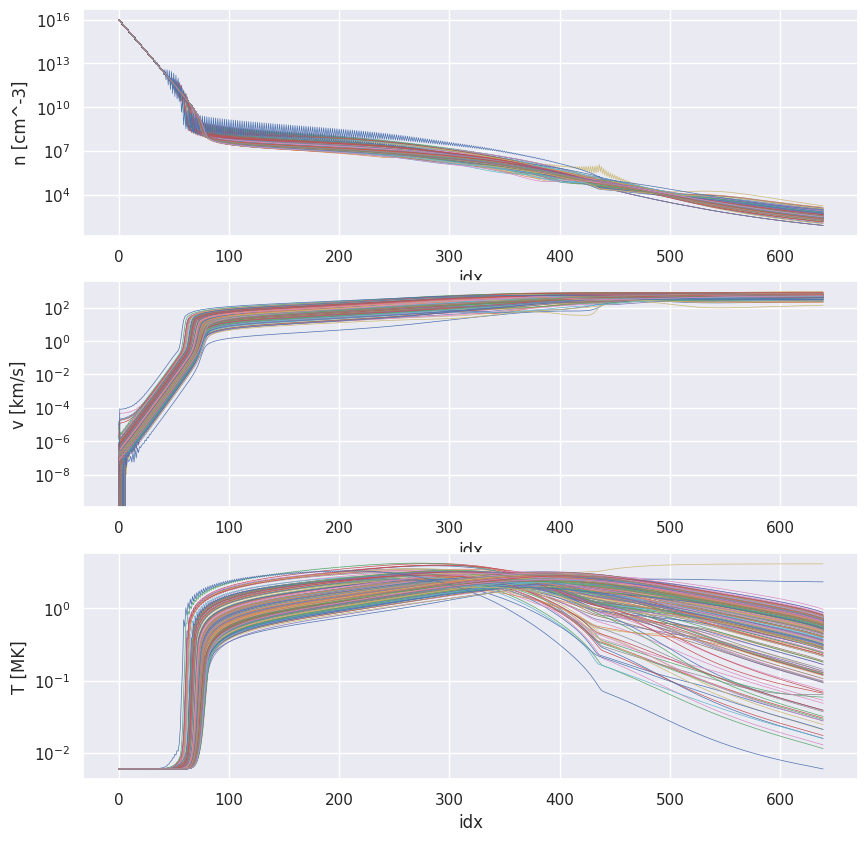

In [7]:
plot_file_data(real_files, ['n [cm^-3]', 'v [km/s]', 'T [MK]'])

# Input Data Analysis

In [8]:
inputs = pd.DataFrame(columns=['R [Rsun]', 'B [G]', 'alpha [deg]'])

for f in real_files:
    df = pd.read_csv(str(f),  skiprows=2, usecols=['R [Rsun]', 'B [G]', 'alpha [deg]'])

    inputs = pd.concat([inputs, df], ignore_index=True)

inputs.head()

,R [Rsun],B [G],alpha [deg]
0,1.000000,3.257833,-0.277328
1,1.000104,3.257118,-0.275160
2,1.000207,3.256403,-0.272957
3,1.000311,3.255686,-0.270719
4,1.000415,3.254969,-0.268446


In [9]:
inputs.describe()

,R [Rsun],B [G],alpha [deg]
count,754560.000000,754560.000000,754560.000000
mean,4.753787,-1.191640,1.717170
std,7.163561,13.962679,14.908368
min,1.000000,-129.331336,-70.891963
25%,1.020573,-2.248587,-0.129807
50%,1.150943,-0.000717,0.000000
75%,4.244706,1.964486,0.838346
max,31.501335,101.054149,88.593109


[Text(0.5, 0, 'R [Rsun]'), None, [Text(0, 0, '')]]

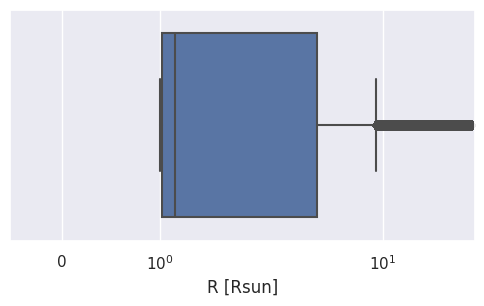

In [10]:
fig,ax = plt.subplots(figsize=(6,3))
bp = sns.boxplot(inputs['R [Rsun]'], orient='h', ax=ax)

bp.set(xlabel="R [Rsun]", xscale="symlog", yticklabels=[])
# ax.set_xscale("log")
# ax.set_label("R [Rsun]")


[Text(0.5, 0, 'B [G]'), None, [Text(0, 0, '')]]

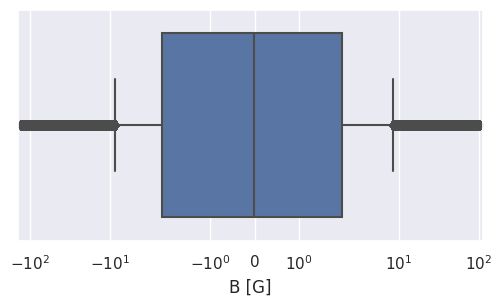

In [11]:
fig,ax = plt.subplots(figsize=(6,3))
bp = sns.boxplot(inputs['B [G]'], orient='h', ax=ax)

bp.set(xlabel='B [G]', xscale="symlog", yticklabels=[])

[Text(0.5, 0, 'alpha [deg]'), None, [Text(0, 0, '')]]

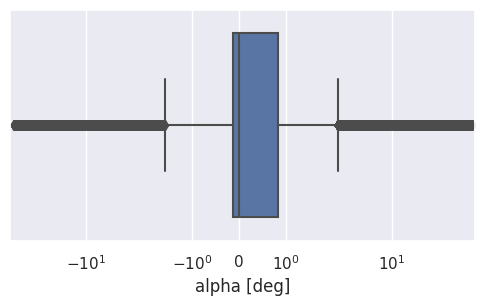

In [12]:
fig,ax = plt.subplots(figsize=(6,3))
bp = sns.boxplot(inputs['alpha [deg]'], orient='h', ax=ax)

bp.set(xlabel='alpha [deg]', xscale="symlog", yticklabels=[])

Text(0.5, 0, 'alpha [deg]')

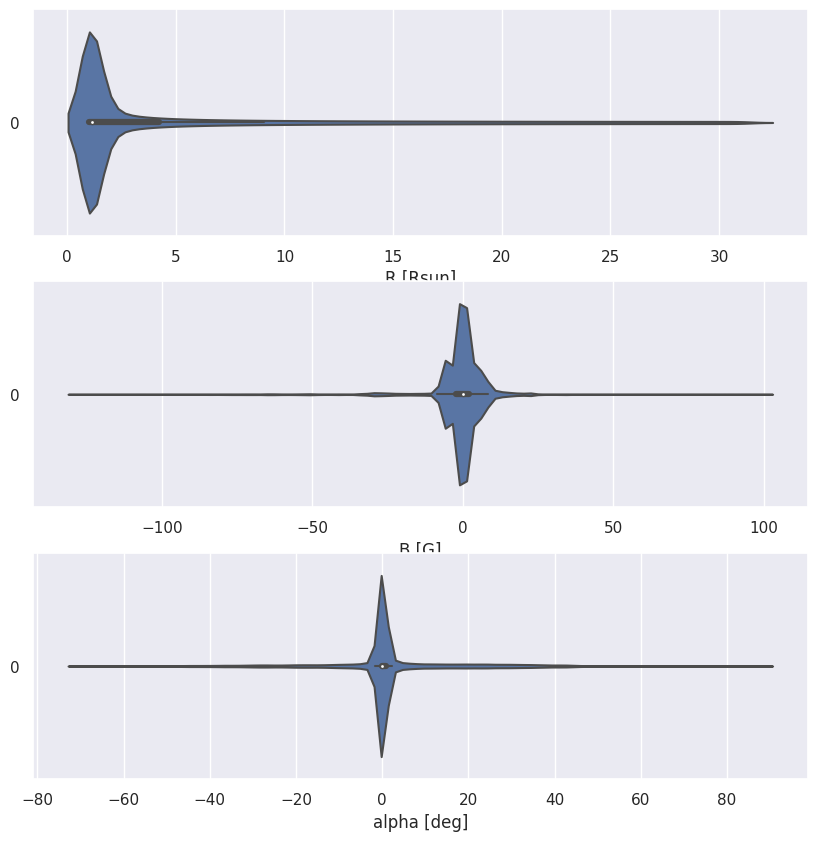

In [13]:
fig, axs = plt.subplots(3, 1, figsize=(10,10))
sns.violinplot(inputs['R [Rsun]'], ax=axs[0], orient='h')
sns.violinplot(inputs['B [G]'], ax=axs[1],orient='h')
sns.violinplot(inputs['alpha [deg]'], ax=axs[2],orient='h')

axs[0].set_xlabel('R [Rsun]')
axs[1].set_xlabel('B [G]')
axs[2].set_xlabel('alpha [deg]')

# for ax in axs:
#     ax.set_xscale("symlog")

<AxesSubplot: >

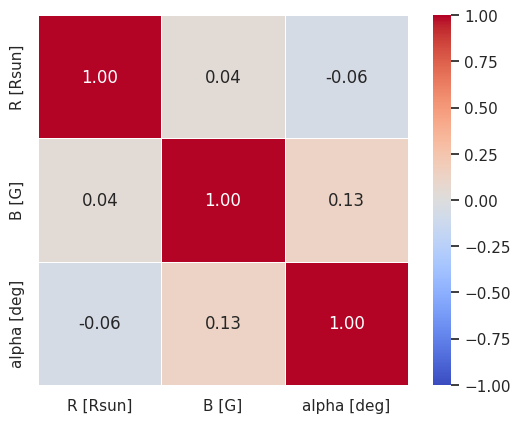

In [14]:
corr = inputs.corr()

fig, ax = plt.subplots()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True, xticklabels=True,
                                                yticklabels=True, figure=fig, ax=ax, annot=True, fmt='.2f',
                                                cmap='coolwarm', linewidths=.5)

# Output Variable Analysis

In [15]:
outputs = pd.DataFrame(columns=['n [cm^-3]', 'v [km/s]', 'T [MK]'])

for f in real_files:
    df = pd.read_csv(str(f),  skiprows=2, usecols=['n [cm^-3]', 'v [km/s]', 'T [MK]'])

    outputs = pd.concat([outputs, df], ignore_index=True)

outputs.head()

,n [cm^-3],v [km/s],T [MK]
0,10003922258297344.0,0.000001,0.006
1,8194619640546560.0,0.0,0.006
2,6716418449361920.0,0.0,0.006
3,5499004871524736.0,0.0,0.006
4,4506524924086016.0,0.0,0.006


In [16]:
outputs.describe()

,n [cm^-3],v [km/s],T [MK]
count,754560,754560,754560.000
unique,729977,735793,681162.000
top,-NaN,NaN,0.006
freq,638,640,10211.000


[Text(0.5, 0, 'n [cm^-3]'), None, [Text(0, 0, '')]]

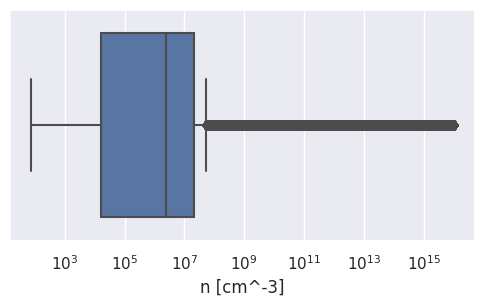

In [17]:
fig,ax = plt.subplots(figsize=(6,3))
bp = sns.boxplot(outputs['n [cm^-3]'], orient='h', ax=ax)

bp.set(xlabel='n [cm^-3]', xscale="log", yticklabels=[])

[Text(0.5, 0, 'v [km/s]'), None, [Text(0, 0, '')]]

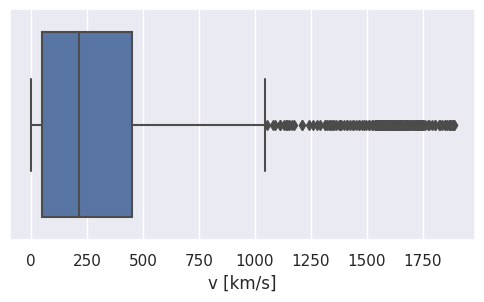

In [18]:
fig,ax = plt.subplots(figsize=(6,3))
bp = sns.boxplot(outputs['v [km/s]'], orient='h', ax=ax)

bp.set(xlabel='v [km/s]', xscale="linear", yticklabels=[])

[Text(0.5, 0, 'T [MK]'), None, [Text(0, 0, '')]]

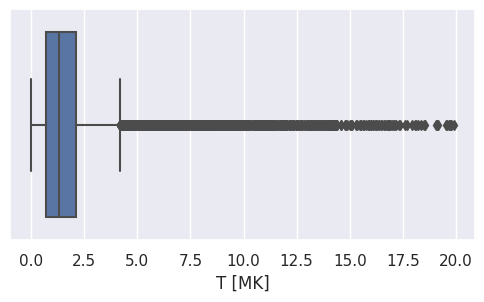

In [19]:
fig,ax = plt.subplots(figsize=(6,3))
bp = sns.boxplot(outputs['T [MK]'], orient='h', ax=ax)

bp.set(xlabel='T [MK]', xscale="linear", yticklabels=[])

Text(0.5, 0, 'T [MK]')

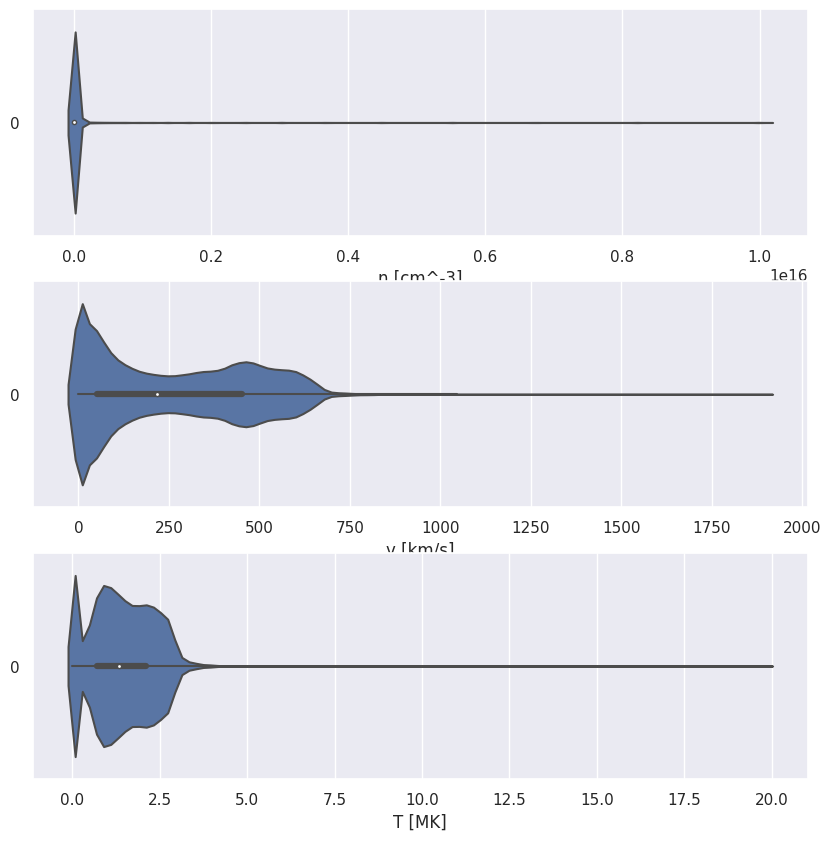

In [20]:
fig, axs = plt.subplots(3, 1, figsize=(10,10))
sns.violinplot(outputs['n [cm^-3]'], ax=axs[0], orient='h')
sns.violinplot(outputs['v [km/s]'], ax=axs[1], orient='h')
sns.violinplot(outputs['T [MK]'], ax=axs[2], orient='h')

axs[0].set_xlabel('n [cm^-3]')
axs[1].set_xlabel('v [km/s]')
axs[2].set_xlabel('T [MK]')

<AxesSubplot: >

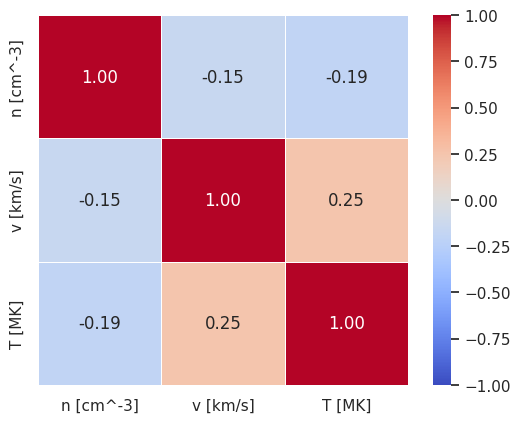

In [21]:
outputs = outputs.astype(np.float64)
corr = outputs.corr()

fig, ax = plt.subplots()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True, xticklabels=True,
                                                yticklabels=True, figure=fig, ax=ax, annot=True, fmt='.2f',
                                                cmap='coolwarm', linewidths=.5)

# Joint Analysis

In [22]:
full_df = pd.concat([inputs, outputs], axis=1)
full_df

,R [Rsun],B [G],alpha [deg],n [cm^-3],v [km/s],T [MK]
0,1.000000,3.257833,-0.277328,1.000392e+16,6.338089e-07,0.006000
1,1.000104,3.257118,-0.275160,8.194620e+15,8.957987e-10,0.006000
2,1.000207,3.256403,-0.272957,6.716418e+15,1.795419e-07,0.006000
3,1.000311,3.255686,-0.270719,5.499005e+15,5.288296e-08,0.006000
4,1.000415,3.254969,-0.268446,4.506525e+15,1.835636e-07,0.006000
...,...,...,...,...,...,...
754555,30.308965,-0.001184,0.000000,4.019339e+02,5.434342e+02,0.592169
754556,30.570504,-0.001164,0.000000,3.970523e+02,5.438422e+02,0.585677
754557,30.832736,-0.001144,0.000000,3.878757e+02,5.442493e+02,0.579054
754558,31.095652,-0.001125,0.000000,3.832431e+02,5.446557e+02,0.572423


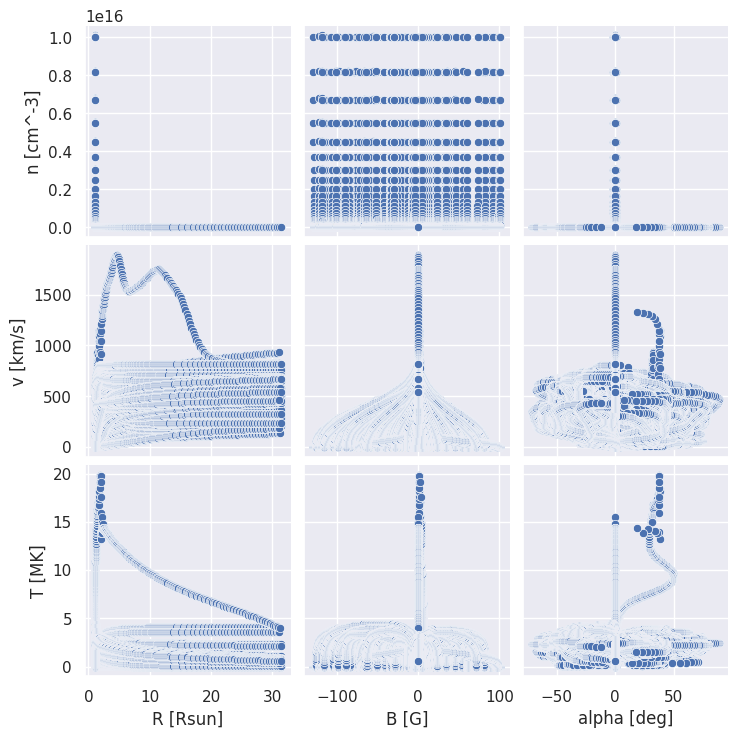

In [23]:

pp = sns.pairplot(full_df, x_vars=['R [Rsun]', 'B [G]', 'alpha [deg]'], y_vars=['n [cm^-3]', 'v [km/s]', 'T [MK]'])
# for ax in pp.axes.flat:
#     ax.set_xscale("log")
    # if ax.get_label() in ['n [cm^-3]', 'v [km/s]', 'T [MK]']:
    #     ax.set_yscale("symlog")

detetar e tirar o outlier de v e T

<AxesSubplot: >

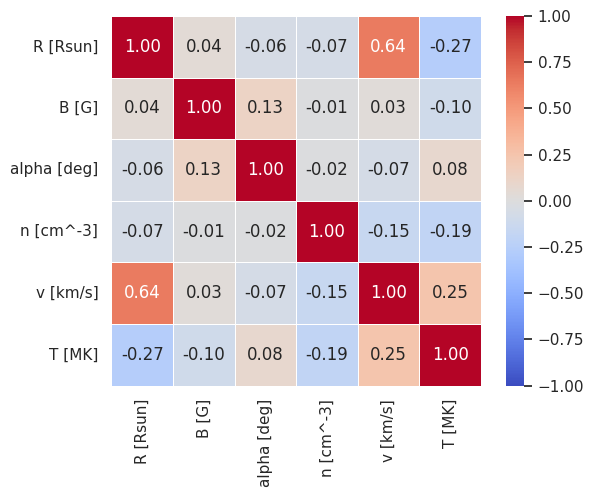

In [24]:
corr = full_df.corr()
fig, ax = plt.subplots()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True, xticklabels=True,
                                                yticklabels=True, figure=fig, ax=ax, annot=True, fmt='.2f',
                                                cmap='coolwarm', linewidths=.5)